In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

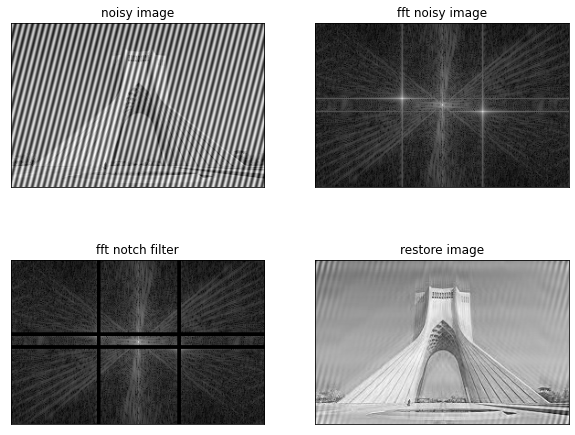

In [22]:
img = cv2.imread("azadi_tower.jpg", cv2.IMREAD_GRAYSCALE)
imgd = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)

# Apply periodic noise
[m, n] = imgd.shape
[a, b] = np.meshgrid(range(0, n), range(0, m))
periodic_noise = np.sin(a+b/4)+1
noisy_img = (imgd + periodic_noise)/2

# noisy_image in frequency domain
fft_noisy_image = np.fft.fftshift(np.fft.fft2(noisy_img))
imgF_d = np.abs(fft_noisy_image)
img_log = np.log(1+imgF_d)
max_val = np.max(np.max(img_log))

# create notch_filter
notch_filter = np.ones((m, n))

notch_filter[80:84, :] = 0
notch_filter[94:98, :] = 0
notch_filter[:, 94:98] = 0
notch_filter[:, 182:186] = 0

# Apply notch_filter on noisy_image
filter_img = fft_noisy_image * notch_filter

filter_img_d = np.abs(filter_img)
filter_img_log = np.log(1+filter_img_d)
filter_img_max_val = np.max(np.max(filter_img_log))

# restore_img in spatial domain
restore_img = np.fft.ifft2(np.fft.ifftshift(filter_img))
restore_img_d = np.abs(restore_img)
restore_img_log = np.log(1+restore_img_d)
restore_img_max_val = np.max(np.max(restore_img_log))


fig, axes= plt.subplots(2, 2, figsize=(10, 8))
axes[0,0].imshow(noisy_img, cmap='gray')
axes[0,0].set_title('noisy image')

axes[0,1].imshow(img_log/max_val, cmap='gray')
axes[0,1].set_title('fft noisy image')

axes[1,0].imshow(filter_img_log/filter_img_max_val, cmap='gray')
axes[1,0].set_title('fft notch filter')

axes[1,1].imshow(restore_img_log/restore_img_max_val, cmap='gray')
axes[1,1].set_title('restore image')

for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])


plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()
